⏳ Chargement des données depuis : ../01-Healthcare-Life-Sciences/insurance.csv ...
✅ Fichier chargé avec succès ! (Taille : (1338, 7))



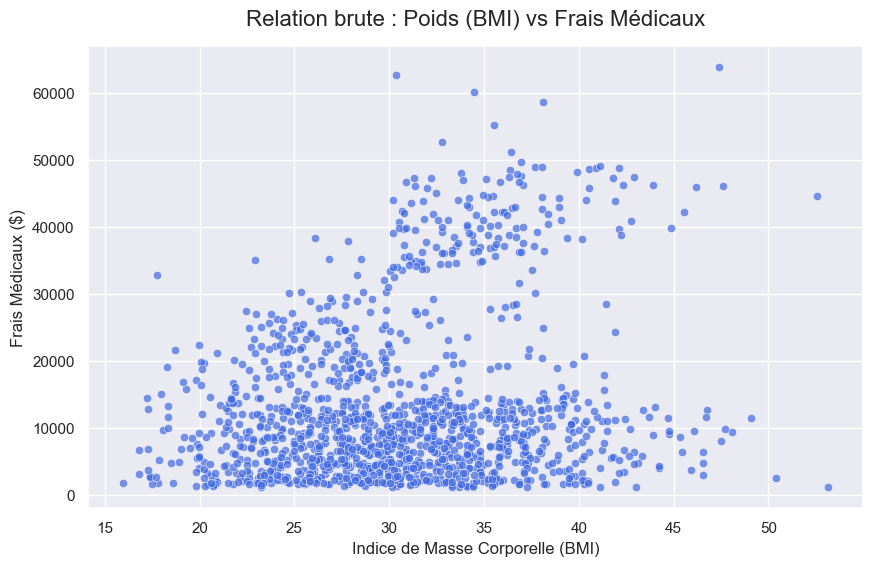

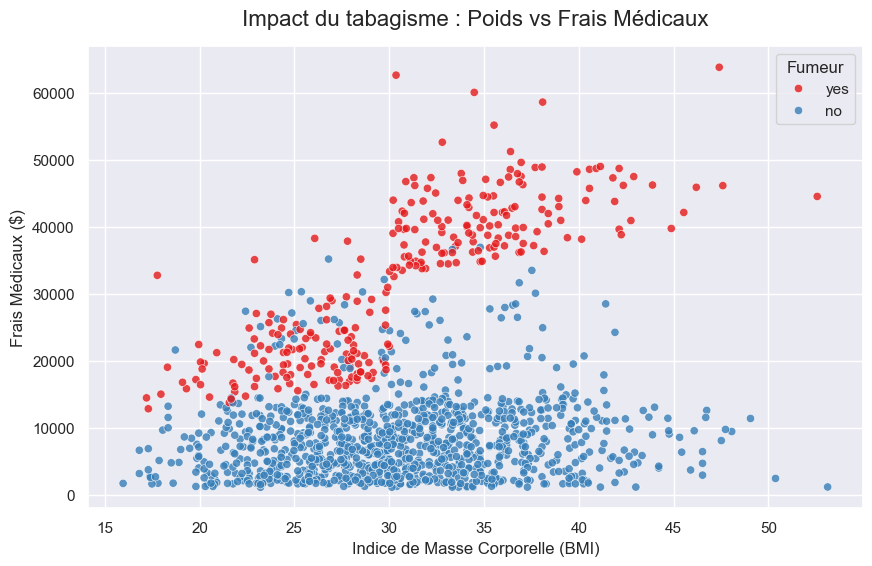

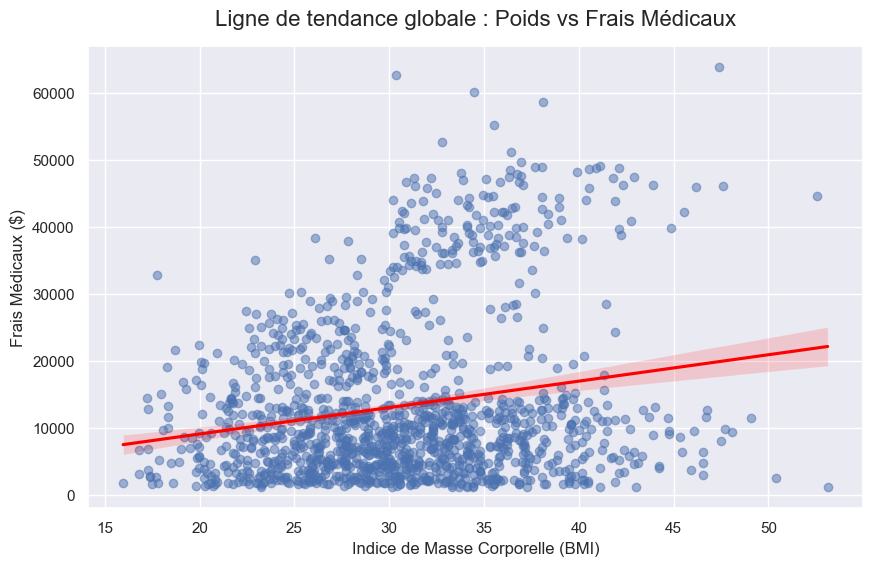

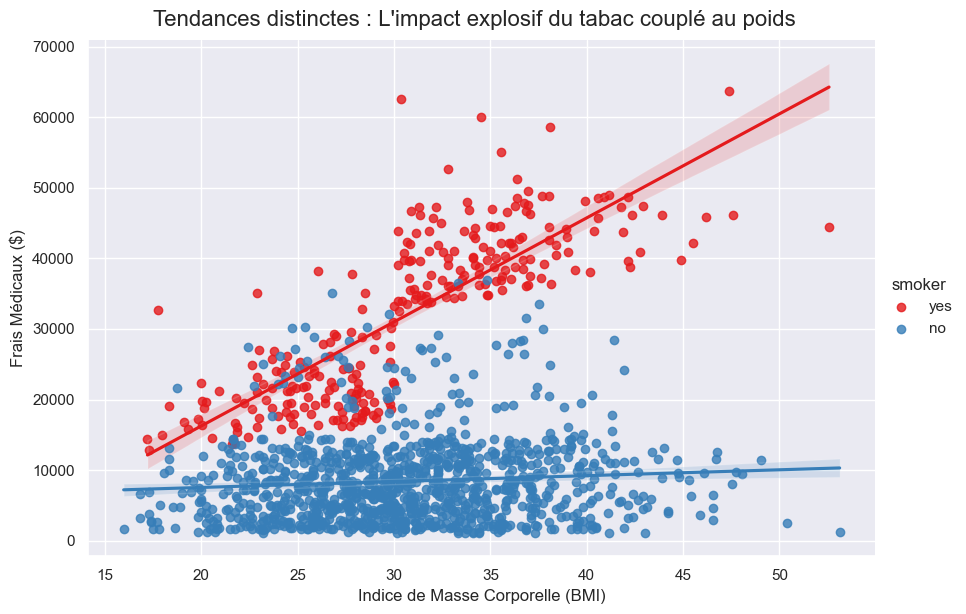

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7764\238979363.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='smoker', y='charges', data=insurance_data, palette="Set2", size=3)


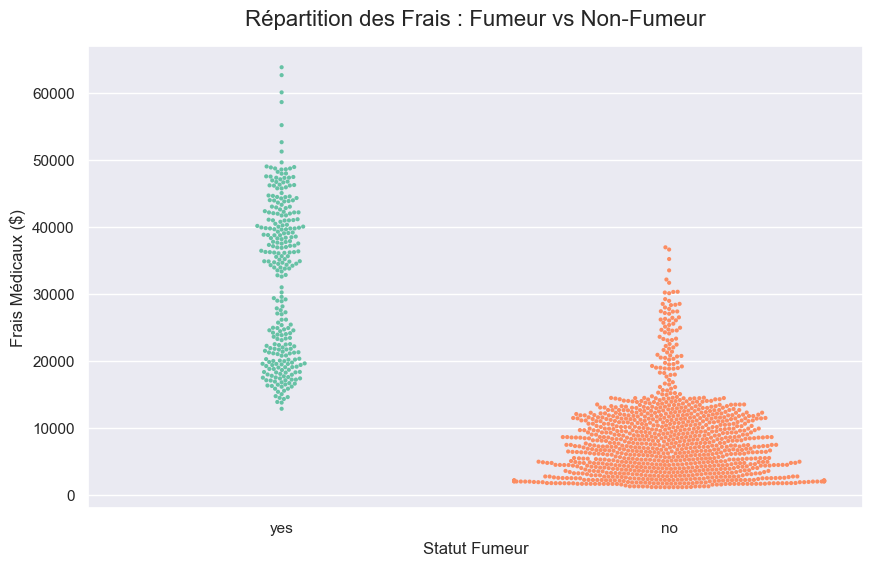

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style visuel
sns.set_theme(style="darkgrid")

# Chemin dynamique adaptatif (Git-Ready)
if os.path.exists("01-Healthcare-Life-Sciences/insurance.csv"):
    file_path = "01-Healthcare-Life-Sciences/insurance.csv"
elif os.path.exists("../01-Healthcare-Life-Sciences/insurance.csv"):
    file_path = "../01-Healthcare-Life-Sciences/insurance.csv"
else:
    file_path = "insurance.csv"

if os.path.exists(file_path):
    print(f"⏳ Chargement des données depuis : {file_path} ...")
    # On charge le dataset
    insurance_data = pd.read_csv(file_path)
    print(f"✅ Fichier chargé avec succès ! (Taille : {insurance_data.shape})\n")

    # ==========================================
    # 1. RELATION BRUTE : Poids (BMI) vs Prix
    # ==========================================
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='bmi', y='charges', data=insurance_data, color="royalblue", alpha=0.7)
    plt.title("Relation brute : Poids (BMI) vs Frais Médicaux", fontsize=16, pad=15)
    plt.xlabel("Indice de Masse Corporelle (BMI)", fontsize=12)
    plt.ylabel("Frais Médicaux ($)", fontsize=12)
    plt.show()

    # ==========================================
    # 2. SÉPARATION FUMEUR / NON-FUMEUR
    # ==========================================
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_data, palette="Set1", alpha=0.8)
    plt.title("Impact du tabagisme : Poids vs Frais Médicaux", fontsize=16, pad=15)
    plt.xlabel("Indice de Masse Corporelle (BMI)", fontsize=12)
    plt.ylabel("Frais Médicaux ($)", fontsize=12)
    plt.legend(title="Fumeur")
    plt.show()

    # ==========================================
    # 3. RELATION AVEC LIGNE DE TENDANCE GLOBALE (Regplot)
    # ==========================================
    plt.figure(figsize=(10, 6))
    sns.regplot(x='bmi', y='charges', data=insurance_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title("Ligne de tendance globale : Poids vs Frais Médicaux", fontsize=16, pad=15)
    plt.xlabel("Indice de Masse Corporelle (BMI)", fontsize=12)
    plt.ylabel("Frais Médicaux ($)", fontsize=12)
    plt.show()

    # ==========================================
    # 4. DOUBLE TENDANCE : Fumeurs vs Non-Fumeurs (Lmplot)
    # ==========================================
    # Lmplot gère sa propre taille avec height et aspect
    lm = sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data, palette="Set1", height=6, aspect=1.5)
    lm.fig.suptitle("Tendances distinctes : L'impact explosif du tabac couplé au poids", y=1.02, fontsize=16)
    lm.set_axis_labels("Indice de Masse Corporelle (BMI)", "Frais Médicaux ($)")
    plt.show()

    # ==========================================
    # 5. DISTRIBUTION DES PRIX (Swarmplot)
    # ==========================================
    plt.figure(figsize=(10, 6))
    # Ajout de size=3 pour éviter que les points ne se superposent trop (erreur fréquente)
    sns.swarmplot(x='smoker', y='charges', data=insurance_data, palette="Set2", size=3)
    plt.title("Répartition des Frais : Fumeur vs Non-Fumeur", fontsize=16, pad=15)
    plt.xlabel("Statut Fumeur", fontsize=12)
    plt.ylabel("Frais Médicaux ($)", fontsize=12)
    plt.show()

else:
    print("❌ Erreur : Impossible de trouver le fichier 'insurance.csv'. Vérifie l'arborescence.")